Analyze traffic accident data to identify patterns related to road conditons, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("US_Accidents_March23.csv")

# Convert time column
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract hour for time-of-day analysis
df['Hour'] = df['Start_Time'].dt.hour

# Drop rows with missing location
df = df.dropna(subset=['Start_Lat', 'Start_Lng'])

df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,5.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,6.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,6.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,7.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,7.0


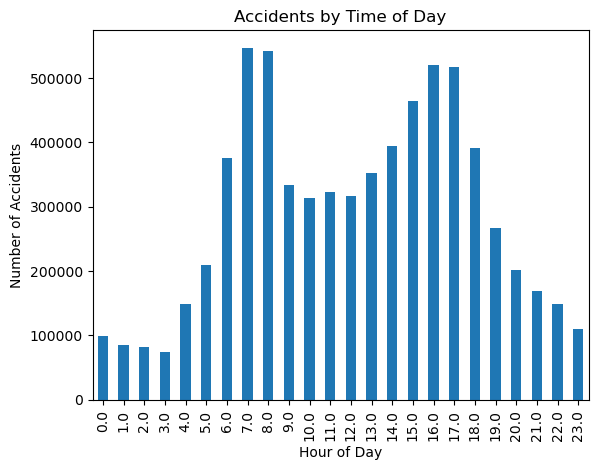

In [2]:
accidents_by_hour = df['Hour'].value_counts().sort_index()

plt.figure()
accidents_by_hour.plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Time of Day")
plt.show()


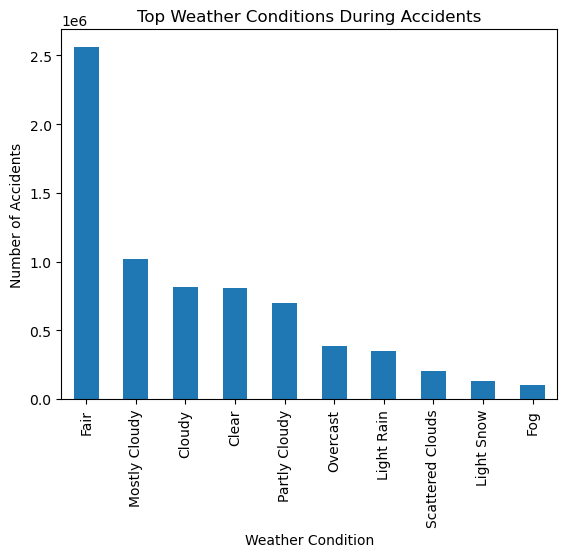

In [3]:
weather_counts = df['Weather_Condition'].value_counts().head(10)

plt.figure()
weather_counts.plot(kind='bar')
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Top Weather Conditions During Accidents")
plt.show()


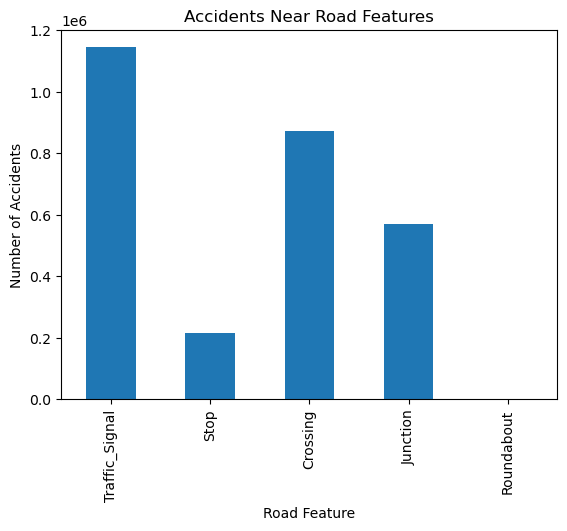

In [4]:
road_features = [
    'Traffic_Signal', 'Stop', 'Crossing',
    'Junction', 'Roundabout'
]

road_data = df[road_features].sum()

plt.figure()
road_data.plot(kind='bar')
plt.xlabel("Road Feature")
plt.ylabel("Number of Accidents")
plt.title("Accidents Near Road Features")
plt.show()


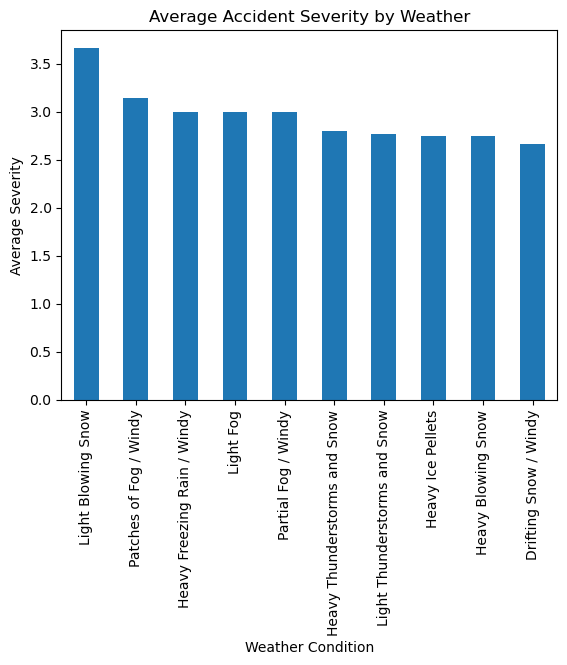

In [5]:
severity_weather = (
    df.groupby('Weather_Condition')['Severity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
severity_weather.plot(kind='bar')
plt.xlabel("Weather Condition")
plt.ylabel("Average Severity")
plt.title("Average Accident Severity by Weather")
plt.show()


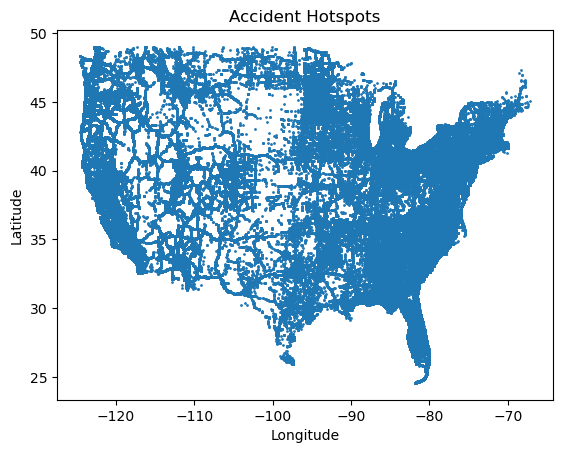

In [6]:
plt.figure()
plt.scatter(df['Start_Lng'], df['Start_Lat'], s=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Hotspots")
plt.show()
